<a href="https://colab.research.google.com/github/dubeyayush-exe/LabEXP/blob/main/AutoEncoders_Exp_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


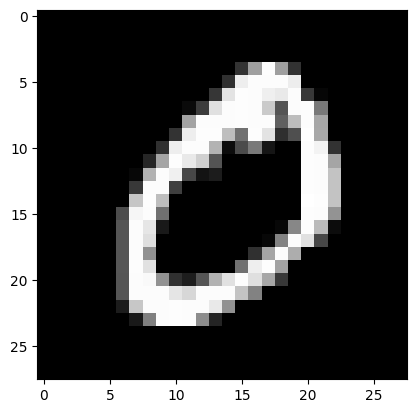

In [5]:
plt.imshow(x_train[1], cmap="gray")

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
encoder_input = keras. Input(shape=(28,28,1), name="img")
x = keras.layers. Flatten() (encoder_input)
encoder_output = keras. layers. Dense(64, activation="relu") (x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras. layers. Dense(784, activation="relu") (encoder_output)
#x = keras. layers.Dense(784, activation="relu") (decoder_input)
decoder_output = keras. layers. Reshape((28, 28, 1)) (decoder_input)

opt = keras. optimizers.Adam(learning_rate=0.001, decay = 1e-6)

autoencoder = keras. Model(encoder_input, decoder_output, name="autoencoder")
autoencoder. summary ()

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.compile(opt, loss="mse")

In [10]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0304 - val_loss: 0.0143
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0141 - val_loss: 0.0134
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0133 - val_loss: 0.0131


In [11]:
example=encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
print(example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[0.47736683 0.30229276 0.5706705  1.4322114  1.4779861  2.9599879
 1.5622952  0.30678758 0.40441644 0.08927458 2.450341   0.7026437
 1.3234222  1.1848447  0.98644865 1.6539246  0.6959281  0.6929588
 0.38606977 0.41560552 1.2575214  0.70855457 0.         1.1026475
 2.4450302  0.         0.8271795  0.088924   0.42219555 0.53339374
 0.92907834 0.81371105 0.9621064  0.84801453 1.8831848  2.0308113
 1.1316881  0.         0.59178185 1.5533466  0.39877748 0.91275364
 0.33688593 2.031054   0.         2.1059098  0.2978497  1.2344999
 0.         0.6589898  1.2861924  0.66955984 0.66744757 0.
 2.4201632  0.23310217 0.22921371 2.1169891  1.2900544  0.7092632
 1.7322687  0.15937652 1.342451   1.6567689 ]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: img
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)


In [12]:
example.shape

(64,)

In [13]:
64/784

0.08163265306122448

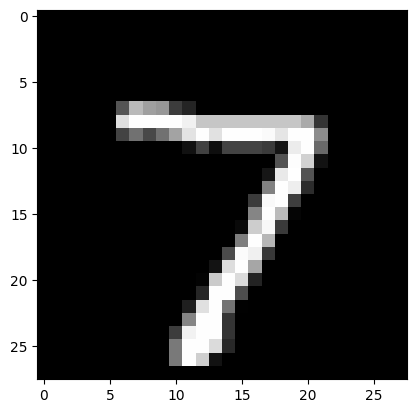

In [14]:
plt.imshow(x_test[0], cmap="gray")

In [15]:
ae_out = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


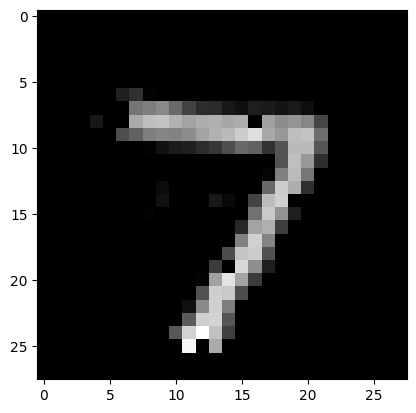

In [16]:
plt.imshow(ae_out, cmap="gray")

In [17]:
import random

In [18]:
def add_noise(img, random_chance=5) :
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random. choice(range(100)) <= random_chance:
              new_val = random.uniform(0, 1)
              new_row. append (new_val)
            else:
              new_row.append (pix)
        noisy.append(new_row)
    return np.array(noisy)

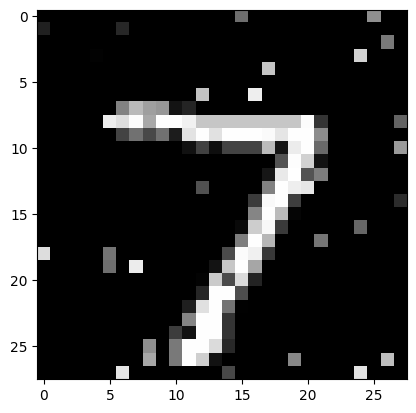

In [19]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap="gray")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


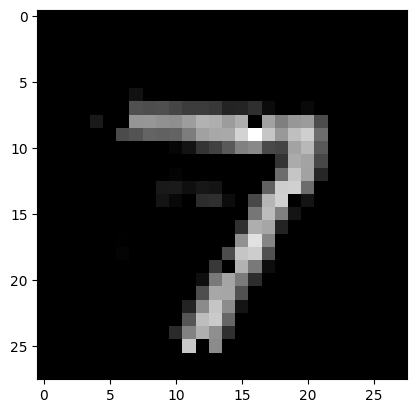

In [20]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap="gray")